In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import pathlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import datetime

In [2]:
train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [3]:
BATCH_SIZE = 3
train_dataset = train.flow_from_directory('dataset 2/train', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='categorical')
val_dataset = test.flow_from_directory('dataset 2/validation', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='categorical')
test_dataset = test.flow_from_directory('dataset 2/test', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='categorical')

Found 60 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
convDim = 3
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (convDim,convDim), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (convDim,convDim), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (convDim,convDim), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (convDim,convDim), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (convDim,convDim), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (convDim,convDim), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# from tensorflow.keras.utils import plot_model
# plot_model(model, show_shapes=True, to_file="current_cnn.png")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [5]:
EPOCH = 20
model_fit = model.fit(train_dataset, epochs=EPOCH, validation_data=val_dataset) 

Epoch 1/20
20/20 [==============================] - 8s 320ms/step - loss: 0.7203 - accuracy: 0.5500 - val_loss: 0.7117 - val_accuracy: 0.0000e+00
Epoch 2/20
20/20 [==============================] - 6s 296ms/step - loss: 0.6949 - accuracy: 0.4000 - val_loss: 0.6898 - val_accuracy: 1.0000
Epoch 3/20
20/20 [==============================] - 5s 235ms/step - loss: 0.6937 - accuracy: 0.4667 - val_loss: 0.6972 - val_accuracy: 0.0000e+00
Epoch 4/20
20/20 [==============================] - 5s 217ms/step - loss: 0.6940 - accuracy: 0.4167 - val_loss: 0.6917 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 4s 209ms/step - loss: 0.6934 - accuracy: 0.4833 - val_loss: 0.6988 - val_accuracy: 0.0000e+00
Epoch 6/20
20/20 [==============================] - 5s 232ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.7003 - val_accuracy: 0.0000e+00
Epoch 7/20
20/20 [==============================] - 5s 227ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.7008 - val_accurac

In [6]:
test_loss , test_accuracy = model.evaluate(test_dataset)
print(f'Model Accuracy: {test_accuracy}')

7/7 [==============================] - 1s 126ms/step - loss: 0.6921 - accuracy: 0.5500
Model Accuracy: 0.550000011920929


In [7]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions,2)
predictions

7/7 [==============================] - 1s 118ms/step


array([[0.52, 0.48],
       [0.5 , 0.5 ],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.5 , 0.5 ]], dtype=float32)

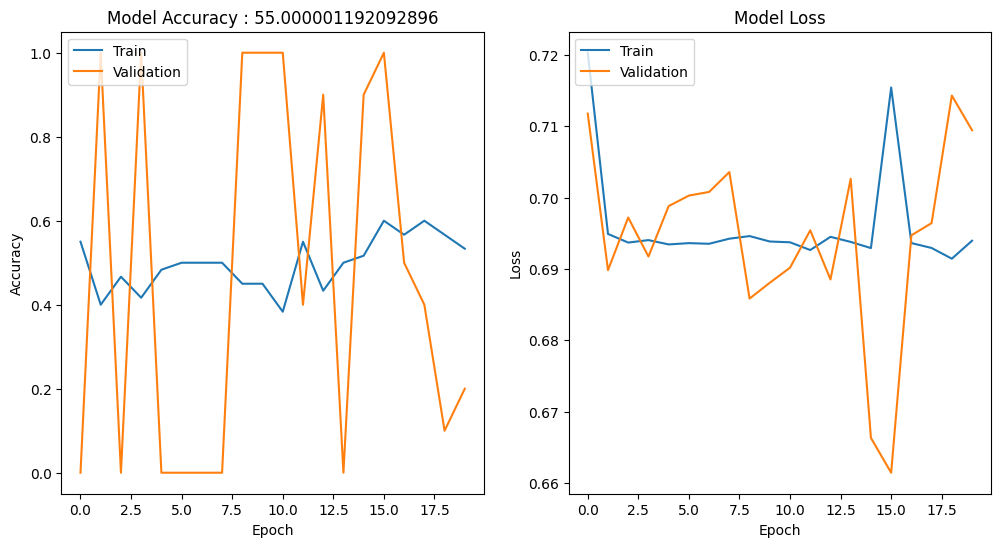

In [8]:
# Plot training and validation history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])  # Add validation accuracy
plt.title(f'Model Accuracy : {test_accuracy*100}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])  # Add validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Get current date and time
now = datetime.datetime.now()

# Format the date-time string as 'MMDDYYYY-HHMM'
date_time_str = now.strftime("%d%m%Y-%H%M%S")

# Save the plot with the specified name format
# plt.savefig(f"{date_time_str}.png")
plt.show()

7/7 [==============================] - 1s 135ms/step


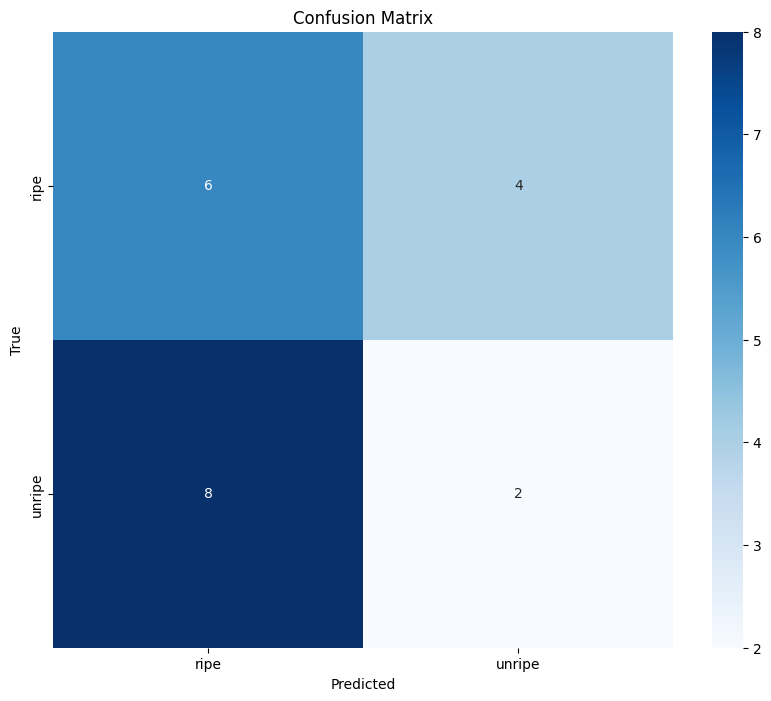

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0]


In [9]:
# Get true labels and predictions
true_labels = test_dataset.classes
class_names = list(test_dataset.class_indices.keys())

predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(true_labels)
print(predicted_classes)

In [10]:
# # save model to .keras file
# now = datetime.datetime.now()
# # Format the date-time string as 'MMDDYYYY-HHMM'
# date_time_str = now.strftime("%d%m%Y-%H%M%S")

In [11]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the TFLite model to a file
# with open(f'{date_time_str}.tflite', 'wb') as f:
#     f.write(tflite_model)

ROC and AUC to determine the most optimal threshold for Confussion Matrix \
Credit : https://www.youtube.com/watch?v=Joh3LOaG8Q0 (Dr. Sreenivas Bhattiprolu)

In [12]:
# # Make predictions
# y_preds = model.predict(X_test).ravel()

# fpr, tpr, thresholds = roc_curve(y_test, y_preds)
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'y--')
# plt.plot(fpr, tpr, marker='.')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.show()

In [13]:
# i = np.arange(len(tpr)) 
# roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
# ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
# print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 